# THE ANALYSIS OF CRIME WITH DEVELOPMENT FACTORS LIKE GDP AND UNEMPLOYMENT RATE

### AUTHOR: SATYAM KUMAR
1938105

BSC PHYSICAL SCIENCE WITH CS

SEC 2020

## OVERVIEW

The Crime rate and the development factors like gdp and the unemployment rate seems very intertwined with a nations development and progress. And there is a possibility that these factors are intertwined or related with each other as well.
In this paper we will unravel the relationship, if there exists one, in these factors effecting a nation's performance.

### DATASETS USED:

https://storage.googleapis.com/kagglesdsdata/datasets/29468/115418/crimes.csv


https://storage.googleapis.com/kagglesdsdata/datasets/299499/612911/ab40c054-5031-4376-b52e-9813e776f65e.csv.csv


https://storage.googleapis.com/kagglesdsdata/datasets/15506/20589/full_data.csv

https://storage.googleapis.com/kaggle-data-sets/625643/1115196/bundle/archive.zip
    
    
https://storage.googleapis.com/kagglesdsdata/datasets/99720/235618/2014_world_gdp_with_codes.csv


https://storage.googleapis.com/kagglesdsdata/datasets/86429/199187/Crimes_UN_data.csv

## IMPORTING NECESSARY MODULES

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

## NOTE

The data required for analysis was clean and was very clumsy and fragmented with lots of missing values, so most of the code chunks here are just to bring the data regarding the yearwise crime of world in a usable format for further analysis.

Like here the data is fragmented into various files and it has to be merged together for further use.

## DATA CLEANING

In [99]:
import glob
print(glob.glob("C:\\Users\\Satyam\\Downloads\\archive\*.csv"),end='\n') #LIST OF FILES TO BE MERGED FROM A FOLDER

['C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1a.csv', 'C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1b.csv', 'C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1c.csv', 'C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1d.csv', 'C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1e.csv', 'C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1f.csv', 'C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1g.csv', 'C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1h.csv', 'C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1i.csv', 'C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1j.csv', 'C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1k.csv', 'C:\\Users\\Satyam\\Downloads\\archive\\theglobaleconomy_corruption.csv']


### LOADING ALL THE FILES AND MERGING THEM CONTAINING DIFFERENT CRIMES REPORTED BY THE POLICE OF DIFFERENT COUNTRIES YEARLY

In [100]:
un_crime_yrly=None
col=["Assault","Kidnapping","Theft","Robbery","Burglary","Domestic_Burglary","Theft_of_Private_Cars","Motor_Vehicle_Theft","Total_Sexual_Violence","Rape","Sexual_Offences_ag_Children"]
string="abcdefghijk"

for i in range(len(string)): #HERE THE LOOP IS BEING USED TO MERGE DATA CONTAINING DIFFERENT CRIMES YEAWISE RECORDED BY THE POLICE IN THE WORLD COUNTRYWISE 
    l=string[i]
    names=["%s_Rel_20%02d"%(col[i],j) for j in range(3,15)]
    tmp= pd.read_csv('C:\\Users\\Satyam\\Downloads\\archive\\Publication Reports_1%s.csv'%l,sep=";",index_col=[2],header=None,skipinitialspace=True,skiprows=10, encoding='latin1',names=["Region","Sub-Region","Country",*["%s_Abs_20%02d"%(col[i],j) for j in range(3,15)],"nothing",*["%s_Rel_20%02d"%(col[i],j) for j in range(3,15)]],)
    tmp.reset_index(inplace=True)
    tmp["Country"]=tmp["Country"].str.replace("*","").str.replace(" of America","").str.replace(" (England and Wales)","",regex=False).str.replace("Russian Federation","Russia").str.replace("Republic of ","").str.replace(" (Plurinational State of)","",regex=False).str.replace("Korea","Korea, South",regex=False)
    tmp.set_index("Country",inplace=True)
    tmp.drop(columns=["Region","Sub-Region","nothing"],inplace=True)
    for n in names:
        tmp[n]=tmp[n].str.replace(".","").str.replace(",([0-9])$",lambda m: "."+m[1]).astype(float)
    tmp=tmp.loc[tmp.index.dropna()]
    
    un_crime_yrly=tmp  if un_crime_yrly is None else un_crime_yrly.merge(tmp,how="outer",on="Country")
un_crime_yrly.drop("Country/territory",inplace=True)

In [101]:
un_crime_yrly #ABS MEANS ABSOLUTE NUMBER OF CRIMES RECORDED
              #REL MEANS RELATIVE NUMBER WRT PREVIOUS YEAR

,Assault_Abs_2003,Assault_Abs_2004,Assault_Abs_2005,Assault_Abs_2006,Assault_Abs_2007,Assault_Abs_2008,Assault_Abs_2009,Assault_Abs_2010,Assault_Abs_2011,Assault_Abs_2012,...,Sexual_Offences_ag_Children_Rel_2005,Sexual_Offences_ag_Children_Rel_2006,Sexual_Offences_ag_Children_Rel_2007,Sexual_Offences_ag_Children_Rel_2008,Sexual_Offences_ag_Children_Rel_2009,Sexual_Offences_ag_Children_Rel_2010,Sexual_Offences_ag_Children_Rel_2011,Sexual_Offences_ag_Children_Rel_2012,Sexual_Offences_ag_Children_Rel_2013,Sexual_Offences_ag_Children_Rel_2014
Country,,,,,,,,,,,,,,,,,,,,,
Burundi,NaN,NaN,NaN,NaN,NaN,437.000,496.000,304.000,499.000,455.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kenya,NaN,NaN,12.715,13.186,12.089,11.479,14.189,14.078,14.366,14.534,...,6.0,8.0,10.7,9.8,13.6,16.5,15.7,16.3,15.5,16.9
Mauritius,105.0,144.000,122.000,106.000,140.000,148.000,274.000,238.000,230.000,NaN,...,NaN,NaN,NaN,NaN,74.5,88.0,87.7,NaN,NaN,NaN
Mozambique,NaN,1.350,1.272,800.000,724.000,728.000,526.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rwanda,NaN,NaN,NaN,NaN,NaN,2.249,1.985,2.004,2.526,3.177,...,NaN,NaN,NaN,43.0,33.3,33.2,34.8,31.4,27.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Solomon Islands,NaN,1.207,1.213,1.168,1.184,1.097,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.8,8.8,9.8,11.5,11.8,13.2,14.1,12.2,NaN,NaN




Here the country codes are needed for identifying the country with the codes provided by the UN.



In [102]:
world_code=pd.read_csv(r'C:\Users\Satyam\Downloads\2014_world_gdp_with_codes.csv')
world_code["Country"]=world_code["COUNTRY"]
world_code=world_code.drop(columns=["COUNTRY","GDP (BILLIONS)"])
world_code

,CODE,Country
0,AFG,Afghanistan
1,ALB,Albania
2,DZA,Algeria
3,ASM,American Samoa
4,AND,Andorra
...,...,...
217,VGB,Virgin Islands
218,WBG,West Bank
219,YEM,Yemen
220,ZMB,Zambia


### MERGING THE  DATA WITH  THE CODES

In [103]:
un_crime_yrly=un_crime_yrly.reset_index().merge(world_code,how="outer")
un_crime_yrly.sort_index(inplace=True)
un_crime_yrly.set_index("Country",inplace=True)
un_crime_yrly.sort_index(inplace=True)
un_crime_yrly #MERGED THE DATA WITH THE COUNTRY CODES

,Assault_Abs_2003,Assault_Abs_2004,Assault_Abs_2005,Assault_Abs_2006,Assault_Abs_2007,Assault_Abs_2008,Assault_Abs_2009,Assault_Abs_2010,Assault_Abs_2011,Assault_Abs_2012,...,Sexual_Offences_ag_Children_Rel_2006,Sexual_Offences_ag_Children_Rel_2007,Sexual_Offences_ag_Children_Rel_2008,Sexual_Offences_ag_Children_Rel_2009,Sexual_Offences_ag_Children_Rel_2010,Sexual_Offences_ag_Children_Rel_2011,Sexual_Offences_ag_Children_Rel_2012,Sexual_Offences_ag_Children_Rel_2013,Sexual_Offences_ag_Children_Rel_2014,CODE
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG
Albania,NaN,NaN,165.00,246.000,219.000,363.000,379.000,178.000,169.000,156.000,...,3.4,5.3,4.0,5.7,4.8,2.4,2.4,3.9,4.1,ALB
Algeria,23.050,20.234,32.92,36.681,36.915,40.398,42.298,41.381,45.548,52.287,...,12.4,13.1,13.8,14.0,13.2,14.3,13.4,18.9,14.0,DZA
American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASM
Andorra,NaN,NaN,NaN,NaN,83.000,105.000,128.000,98.000,144.000,163.000,...,NaN,37.3,55.6,31.2,43.3,81.7,115.3,148.6,103.1,AND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VGB
West Bank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WBG
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,25.000,NaN,NaN,NaN,...,NaN,NaN,NaN,1.9,NaN,NaN,NaN,NaN,NaN,YEM


### EXTRACTING YEARS AS INDICES FROM COLUMNS

In [104]:
crime_clean=pd.DataFrame()
temp=pd.DataFrame()
for i in range(3,15):
    temp=un_crime_yrly[["%s_Abs_20%02d"%(f,i) for f in col]+["%s_Rel_20%02d"%(f,i) for f in col]]
    temp.columns=temp.columns.str.replace("_20%02d"%i,"")
    temp["Year"]=2000+i
    temp=temp.reset_index().set_index(["Country","Year"])
    crime_clean=crime_clean.append(temp)
crime_clean=crime_clean.sort_index().reset_index()
crime_clean.rename(columns={'Country':'Region'},inplace=True)
crime_clean=crime_clean.set_index(['Region','Year'])
crime_clean #CLEANING THE DATA BY GETTING ALL THE YEARS EXTRACTED FROM COLUMNS AS INDICES

<ipython-input-104-9679edc9efc5>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Assault_Abs  Kidnapping_Abs Theft_Abs Robbery_Abs  \
Region      Year                                                      
Afghanistan 2003          NaN             NaN       NaN         NaN   
            2004          NaN             NaN       NaN         NaN   
            2005          NaN             NaN       NaN         NaN   
            2006          NaN             NaN       NaN         NaN   
            2007          NaN             NaN       NaN         NaN   
...                       ...             ...       ...         ...   
Zimbabwe    2010          NaN             NaN       NaN         NaN   
            2011          NaN             NaN       NaN         NaN   
            2012          NaN             NaN       NaN         NaN   
            2013          NaN             NaN       NaN         NaN   
            2014          NaN             NaN       NaN         NaN   

                 Burglary_Abs Domestic_Burglary_Abs  \
Region      Year                                      
Afghanistan 2003          NaN                   NaN   
            2004          NaN                   NaN   
            2005          NaN                   NaN   
            2006          NaN                   NaN   
            2007          NaN                   NaN   
...                       ...                   ...   
Zimbabwe    2010          NaN                   NaN   
            2011          NaN                   NaN   
            2012          NaN                   NaN   
            2013          NaN                   NaN   
            2014          NaN                   NaN   

                  Theft_of_Private_Cars_Abs Motor_Vehicle_Theft_Abs  \
Region      Year                                                      
Afghanistan 2003                        NaN                     NaN   
            2004                        NaN                     NaN   
            2005                        NaN                     NaN   
            2006                        NaN                     NaN   
            2007                        NaN                     NaN   
...                                     ...                     ...   
Zimbabwe    2010                        NaN                     NaN   
            2011                        NaN                     NaN   
            2012                        NaN                     NaN   
            2013                        NaN                     NaN   
            2014                        NaN                     NaN   

                  Total_Sexual_Violence_Abs  Rape_Abs  ...  Kidnapping_Rel  \
Region      Year                                       ...                   
Afghanistan 2003                        NaN       NaN  ...             NaN   
            2004                        NaN       NaN  ...             NaN   
            2005                        NaN       NaN  ...             NaN   
            2006                        NaN       NaN  ...             NaN   
            2007                        NaN       NaN  ...             NaN   
...                                     ...       ...  ...             ...   
Zimbabwe    2010                        NaN       NaN  ...             NaN   
            2011                        NaN       NaN  ...             NaN   
            2012                        NaN       NaN  ...             NaN   
            2013                        NaN       NaN  ...             NaN   
            2014                        NaN       NaN  ...             NaN   

                  Theft_Rel  Robbery_Rel  Burglary_Rel  Domestic_Burglary_Rel  \
Region      Year                                                                
Afghanistan 2003        NaN          NaN           NaN                    NaN   
            2004        NaN          NaN           NaN                    NaN   
            2005        NaN          NaN           NaN                    NaN   
            2006        NaN       

### LOADING SOME MORE DATA

In [105]:
df=pd.read_csv(r'C:\Users\Satyam\Downloads\Crimes_UN_data.csv', skiprows=[0],thousands=",", encoding='latin1')
cols = list(df.columns)
cols[1] = 'Region'
df.columns = cols
crimes = pd.pivot_table(df, values='Value', index=['Region', 'Year'], columns='Series', aggfunc=sum)
crimes=crimes.rename({"United States of America": "United States"}, axis='index')
un_crimes=crime_clean.merge(crimes, left_index=True, right_index=True,how="outer")
un_crimes.columns=un_crimes.columns.str.replace(" per 100,000"," Rel",regex=False).str.replace(" population","",regex=False)
un_crimes #ADDING SOME MORE DATA PROVIDED BY THE UN FOR MORE CREDIBILITY

Assault_Abs  Kidnapping_Abs Theft_Abs Robbery_Abs  \
Region      Year                                                      
Afghanistan 2003          NaN             NaN       NaN         NaN   
            2004          NaN             NaN       NaN         NaN   
            2005          NaN             NaN       NaN         NaN   
            2006          NaN             NaN       NaN         NaN   
            2007          NaN             NaN       NaN         NaN   
...                       ...             ...       ...         ...   
Zimbabwe    2010          NaN             NaN       NaN         NaN   
            2011          NaN             NaN       NaN         NaN   
            2012          NaN             NaN       NaN         NaN   
            2013          NaN             NaN       NaN         NaN   
            2014          NaN             NaN       NaN         NaN   

                 Burglary_Abs Domestic_Burglary_Abs  \
Region      Year                                      
Afghanistan 2003          NaN                   NaN   
            2004          NaN                   NaN   
            2005          NaN                   NaN   
            2006          NaN                   NaN   
            2007          NaN                   NaN   
...                       ...                   ...   
Zimbabwe    2010          NaN                   NaN   
            2011          NaN                   NaN   
            2012          NaN                   NaN   
            2013          NaN                   NaN   
            2014          NaN                   NaN   

                  Theft_of_Private_Cars_Abs Motor_Vehicle_Theft_Abs  \
Region      Year                                                      
Afghanistan 2003                        NaN                     NaN   
            2004                        NaN                     NaN   
            2005                        NaN                     NaN   
            2006                        NaN                     NaN   
            2007                        NaN                     NaN   
...                                     ...                     ...   
Zimbabwe    2010                        NaN                     NaN   
            2011                        NaN                     NaN   
            2012                        NaN                     NaN   
            2013                        NaN                     NaN   
            2014                        NaN                     NaN   

                  Total_Sexual_Violence_Abs  Rape_Abs  ...  Rape_Rel  \
Region      Year                                       ...             
Afghanistan 2003                        NaN       NaN  ...       NaN   
            2004                        NaN       NaN  ...       NaN   
            2005                        NaN       NaN  ...       NaN   
            2006                        NaN       NaN  ...       NaN   
            2007                        NaN       NaN  ...       NaN   
...                                     ...       ...  ...       ...   
Zimbabwe    2010                        NaN       NaN  ...       NaN   
            2011                        NaN       NaN  ...       NaN   
            2012                        NaN       NaN  ...       NaN   
            2013                        NaN       NaN  ...       NaN   
            2014                        NaN       NaN  ...       NaN   

                  Sexual_Offences_ag_Children_Rel  Assault rate Rel  \
Region      Year                                                      
Afghanistan 2003                              NaN               NaN   
            2004                              NaN               NaN   
            2005                              NaN               NaN   
            2006                              NaN               NaN   
            2007                              NaN               NaN   
...                 

## EXPLORATORY DATA ANALYSIS

In [106]:
column=col[4]
year=14
column_name="%s_Rel_20%02d"%(column,year) 
plot=un_crime_yrly[column_name].fillna(0)
CCs=un_crime_yrly['CODE']
data = [ dict(
        type = 'choropleth',
        locations = CCs,
        z = plot,
        text = un_crime_yrly.index,
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False, title = column_name.replace("_"," ")),
      ) ]

layout = dict(
    title = 'PLOT OF BURGLARY HAPPENED IN THE WORLD REATIVE TO 2014 ',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'robinson'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [107]:
column=col[0]
year=14
column_name="%s_Rel_20%02d"%(column,year) 
plot=un_crime_yrly[column_name].fillna(0)
CCs=un_crime_yrly['CODE']
data = [ dict(
        type = 'choropleth',
        locations = CCs,
        z = plot,
        text = un_crime_yrly.index,
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False, title = column_name.replace("_"," ")),
      ) ]

layout = dict(
    title = 'PLOT OF ASSAULT HAPPENED IN THE WORLD REATIVE TO 2014 ',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'robinson'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [108]:
column=col[1]
year=14
column_name="%s_Rel_20%02d"%(column,year) 
plot=un_crime_yrly[column_name].fillna(0)
CCs=un_crime_yrly['CODE']
data = [ dict(
        type = 'choropleth',
        locations = CCs,
        z = plot,
        text = un_crime_yrly.index,
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False, title = column_name.replace("_"," ")),
      ) ]

layout = dict(
    title = 'PLOT OF KIDNAAPPING HAPPENED IN THE WORLD REATIVE TO 2014 ',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'robinson'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [109]:
column=col[8]
year=14
column_name="%s_Rel_20%02d"%(column,year) 
plot=un_crime_yrly[column_name].fillna(0)
CCs=un_crime_yrly['CODE']
data = [ dict(
        type = 'choropleth',
        locations = CCs,
        z = plot,
        text = un_crime_yrly.index,
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False, title = column_name.replace("_"," ")),
      ) ]

layout = dict(
    title = 'PLOT OF TOTAL SEXUAL VIOLENCE HAPPENED IN THE WORLD REATIVE TO 2014',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'robinson'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

### AVERAGING ALL THE CRIMES COMITTED IN ALL THE GIVEN YEARS TO GET AN AVERAGE CRIME SCORE FOR BETTER EXPLORATION

In [110]:
un_crime_yrly=un_crime_yrly.fillna(0)
crime_score=pd.DataFrame(un_crime_yrly.mean(axis=1))
crime_score['CODE']=un_crime_yrly['CODE']
crime_score.rename(columns={0:'crime score'},inplace=True)
crime_score #GETTING AN AVERAGE CRIME SCORE FOR EACH COUNTRY FOR EDA

,crime score,CODE
Country,,
Afghanistan,0.000000,AFG
Albania,76.438182,ALB
Algeria,63.378691,DZA
American Samoa,0.000000,ASM
Andorra,65.328182,AND
...,...,...
Virgin Islands,0.000000,VGB
West Bank,0.000000,WBG
Yemen,26.472268,YEM


In [111]:
column_name='crime score'
data = [ dict(
        type = 'choropleth',
        locations = crime_score['CODE'],
        z = crime_score['crime score'],
        text = crime_score.index,
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = column_name.replace("_"," ")),
      ) ]

layout = dict(
    title = 'WORLD PLOT OF ABSOLUTE CRIME SCORE',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type='robinson'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )


In [112]:
un_crimes=un_crimes.fillna(0)
crime_score_yrly=pd.DataFrame(un_crimes.mean(axis=1,skipna=True))
crime_score_yrly.rename(columns={0:'crime_score'},inplace=True)
crime_score_yrly #GETTING AN AVERAGE YEARLY CRIME SCORE FOR COUNTRIES

crime_score
Region      Year             
Afghanistan 2003        0.000
            2004        0.000
            2005        0.000
            2006        0.000
            2007        0.000
...                       ...
Zimbabwe    2010        0.200
            2011        0.000
            2012        0.808
            2013        0.000
            2014        0.000

[3091 rows x 1 columns]

### LOADING THE GDP DATA

In [113]:
world_gdp_yrly = pd.read_csv(r'C:\Users\Satyam\Downloads\archive1\GDP.csv', encoding='latin1')
world_gdp_yrly = world_gdp_yrly.fillna(0)
world_gdp_yrly #LOADING THE DATA FOR GDP

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,...,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,0.000000,0.0
1,Afghanistan,AFG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,0.0
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,...,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,0.0
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,...,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,0.0
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,...,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Kosovo,XKX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7782.875107,8222.285712,8547.652384,8903.763429,9194.741819,9781.019679,10208.857900,10756.663460,11348.363450,0.0
256,"Yemen, Rep.",YEM,2223.028771,2325.263661,2443.920401,2472.188808,2569.648739,2657.813447,2730.145147,2829.866193,...,4472.726448,3876.302619,3935.167105,4084.882967,4045.500031,3320.110156,2827.691023,2645.308383,2575.126385,0.0
257,South Africa,ZAF,6424.502215,6414.057923,6261.716184,6331.777580,6520.866604,6719.583315,7000.801619,7179.806651,...,11728.160490,12179.174190,12488.215570,12815.727070,13090.476830,13185.253280,13188.029620,13438.282890,13686.882360,0.0
258,Zambia,ZMB,1517.926292,1528.781247,1499.340446,1600.347799,1457.627696,1493.123972,1572.973238,1616.492883,...,3269.794329,3419.010460,3634.780353,3765.584162,3893.549478,3927.761816,3998.004435,4090.120040,4223.906936,0.0


### EDA

In [114]:
column_name='GDP' 
plot=world_gdp_yrly['2018'].fillna(0)
CCs=world_gdp_yrly['Country Code']
data = [ dict(
        type = 'choropleth',
        locations = CCs,
        z = plot,
        text = world_gdp_yrly['Country '],
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False, title = 'GDP',
      )) ]

layout = dict(
    title = 'WORLD PLOT OF GDP 2018',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'robinson'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

### LOADING THE UNEMPLOYMENT DATA OF VARIOUS COUNTRIES 

In [115]:
world_unemp_yrly= pd.read_csv(r'C:\Users\Satyam\Downloads\full_data.csv',encoding='latin1')
world_unemp_yrly #GETTING THE UNEMPLOYMENT DATA YEARLY

,Country Name,Region,IncomeGroup,SpecialNotes,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,1.300000,0.800000,0.700000,0.600000,1.800000,1.000000,...,8.20000,8.200000,8.100000,8.200000,8.000000,8.400000,8.600000,8.600000,8.600000,8.500000
1,Angola,Sub-Saharan Africa,Lower middle income,NaN,6.200000,6.100000,5.900000,6.200000,6.400000,6.400000,...,6.40000,6.200000,6.200000,6.200000,6.200000,6.200000,6.200000,6.200000,6.100000,6.200000
2,Albania,Europe & Central Asia,Upper middle income,NaN,12.700000,13.600000,15.000000,14.800000,14.300000,14.100000,...,13.00000,13.800000,14.200000,14.000000,13.400000,15.600000,17.500000,17.100000,15.200000,15.000000
3,Arab World,NaN,NaN,Arab World aggregate. Arab World is composed o...,12.569172,12.899079,13.596881,13.738961,14.560633,14.122322,...,10.29082,9.978365,9.963334,11.079206,11.358198,11.284136,11.376175,11.264614,11.240660,11.096682
4,United Arab Emirates,Middle East & North Africa,High income,NaN,3.200000,3.300000,3.300000,2.100000,1.800000,2.700000,...,4.00000,4.200000,4.100000,4.100000,4.100000,4.100000,4.000000,4.000000,3.800000,3.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Samoa,East Asia & Pacific,Upper middle income,Fiscal year ends on June 30; reporting period ...,2.100000,3.200000,3.300000,5.700000,5.500000,4.900000,...,2.30000,4.400000,8.000000,5.700000,8.700000,8.800000,8.700000,8.800000,7.700000,6.600000
228,"Yemen, Rep.",Middle East & North Africa,Lower middle income,Based on official government statistics and In...,10.600000,13.000000,15.800000,8.300000,15.100000,16.100000,...,15.00000,14.600000,17.799999,17.299999,17.600000,17.600000,17.400000,16.700001,16.200001,16.000000
229,South Africa,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,25.400000,22.400000,25.900000,20.000000,16.900000,21.000000,...,22.40000,23.500000,24.700001,24.600000,24.700001,24.600000,24.900000,25.200001,26.700001,27.299999
230,Zambia,Sub-Saharan Africa,Lower middle income,The base year is 2010. National accounts data ...,18.900000,19.299999,19.700001,18.600000,17.400000,15.000000,...,7.90000,8.600000,10.800000,13.600000,7.800000,7.800000,7.700000,7.700000,7.600000,7.400000


### ADDING THE COUNTRY CODE FOR PLOTTING

In [116]:

for i in world_gdp_yrly['Country ']:
    if world_unemp_yrly['Country Name'].str.contains(i).any():
        world_unemp_yrly.at[world_unemp_yrly[world_unemp_yrly['Country Name'].str.contains(i)].index[0],'Country Code']=str(world_gdp_yrly.set_index('Country ').loc[i]['Country Code'])
        
    else:
        pass
world_unemp_yrly
#MERGING THE DATA WITH COUNTRY CODE FOR CONVENIENCE IN PLOTTING THE WORLD MAP

C:\Users\Satyam\Anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



,Country Name,Region,IncomeGroup,SpecialNotes,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Country Code
0,Afghanistan,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,1.300000,0.800000,0.700000,0.600000,1.800000,1.000000,...,8.200000,8.100000,8.200000,8.000000,8.400000,8.600000,8.600000,8.600000,8.500000,AFG
1,Angola,Sub-Saharan Africa,Lower middle income,NaN,6.200000,6.100000,5.900000,6.200000,6.400000,6.400000,...,6.200000,6.200000,6.200000,6.200000,6.200000,6.200000,6.200000,6.100000,6.200000,AGO
2,Albania,Europe & Central Asia,Upper middle income,NaN,12.700000,13.600000,15.000000,14.800000,14.300000,14.100000,...,13.800000,14.200000,14.000000,13.400000,15.600000,17.500000,17.100000,15.200000,15.000000,ALB
3,Arab World,NaN,NaN,Arab World aggregate. Arab World is composed o...,12.569172,12.899079,13.596881,13.738961,14.560633,14.122322,...,9.978365,9.963334,11.079206,11.358198,11.284136,11.376175,11.264614,11.240660,11.096682,WLD
4,United Arab Emirates,Middle East & North Africa,High income,NaN,3.200000,3.300000,3.300000,2.100000,1.800000,2.700000,...,4.200000,4.100000,4.100000,4.100000,4.100000,4.000000,4.000000,3.800000,3.800000,ARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Samoa,East Asia & Pacific,Upper middle income,Fiscal year ends on June 30; reporting period ...,2.100000,3.200000,3.300000,5.700000,5.500000,4.900000,...,4.400000,8.000000,5.700000,8.700000,8.800000,8.700000,8.800000,7.700000,6.600000,WSM
228,"Yemen, Rep.",Middle East & North Africa,Lower middle income,Based on official government statistics and In...,10.600000,13.000000,15.800000,8.300000,15.100000,16.100000,...,14.600000,17.799999,17.299999,17.600000,17.600000,17.400000,16.700001,16.200001,16.000000,YEM
229,South Africa,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,25.400000,22.400000,25.900000,20.000000,16.900000,21.000000,...,23.500000,24.700001,24.600000,24.700001,24.600000,24.900000,25.200001,26.700001,27.299999,ZAF
230,Zambia,Sub-Saharan Africa,Lower middle income,The base year is 2010. National accounts data ...,18.900000,19.299999,19.700001,18.600000,17.400000,15.000000,...,8.600000,10.800000,13.600000,7.800000,7.800000,7.700000,7.700000,7.600000,7.400000,ZMB


In [117]:
column_name='UNemployment' 
plot=world_unemp_yrly['2017'].fillna(0)#.str.replace(',', '')
CCs=world_unemp_yrly['Country Code']
data = [ dict(
        type = 'choropleth',
        locations = CCs,
        z = plot,
        text = world_unemp_yrly['Country Name'],
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False, title = column_name.replace("_"," ")),
      ) ]

layout = dict(
    title = 'WORLD PLOT FOR UNEMPLOYMENT IN 2017',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'robinson'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

## DATA CLEANING AND WRANGLING

In [118]:
gdp_clean=pd.melt(world_gdp_yrly, id_vars=['Country '],value_vars=[str(i) for i in range(1990,2020)],var_name='year', value_name='GDP').sort_values(by='Country ')
gdp_clean.rename(columns={'Country ':'Region','year':'Year'},inplace=True)
gdp_clean['Year']=pd.to_numeric(gdp_clean['Year'])
gdp_clean.set_index(['Region','Year'],inplace=True)
gdp_clean=gdp_clean.fillna(0)
gdp_clean #GETTING THE YEARS AS INDICES FROM COLUMNS


GDP
Region      Year             
Afghanistan 2009  1454.663015
            2013  1874.765634
            2003   888.153370
            1993     0.000000
            1991     0.000000
...                       ...
Zimbabwe    2014  2648.568967
            2015  2679.580317
            2016  2687.385429
            2003  1885.511354
            2019     0.000000

[7800 rows x 1 columns]

In [119]:
gdp_clean['GDP'].astype('float')
data=crime_score_yrly.merge(gdp_clean,left_index=True,right_on=['Region','Year'])
data #MERGING IT WITH CRIME SCORE FOR FURTHER ANALYSIS

crime_score          GDP
Region      Year                          
Afghanistan 2003        0.000   888.153370
            2004        0.000   885.840819
            2005        0.000   979.273979
            2006        0.000  1031.643135
            2007        0.000  1176.126357
...                       ...          ...
Zimbabwe    2010        0.200  1888.566739
            2011        0.000  2168.110293
            2012        0.808  2534.541919
            2013        0.000  2583.985638
            2014        0.000  2648.568967

[2403 rows x 2 columns]

In [120]:
data.corr() #GETTING THE CORRELATION 

,crime_score,GDP
crime_score,1.000000,0.406727
GDP,0.406727,1.000000


Text(0.5, 1.05, 'Correlation Matrix')

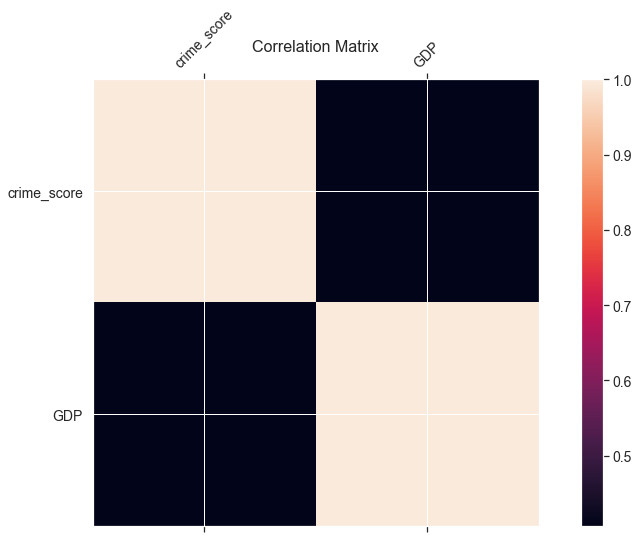

In [121]:
sns.set(rc={'figure.figsize':(15,8),'axes.facecolor':'black'})
f = plt.figure()
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [122]:
clean_unemp=pd.melt(world_unemp_yrly, id_vars=['Country Name'],value_vars=[str(i) for i in range(1991,2018)],var_name='year', value_name='unemp').sort_values(by='Country Name')
clean_unemp['year']=pd.to_numeric(clean_unemp['year'])
clean_unemp.rename(columns={'Country Name':'Region','year':'Year'},inplace=True)
clean_unemp.set_index(['Region','Year'],inplace=True)
clean_unemp #GETTING THE UNEMPLOYMENT DATA


unemp
Region      Year       
Afghanistan 1991    1.3
            2004    8.4
            1993    0.7
            2005    8.5
            2000    1.0
...                 ...
Zimbabwe    2011    5.4
            1995    5.5
            1991    5.8
            1994    5.0
            2017    5.3

[6264 rows x 1 columns]

In [123]:
data_final=data.merge(clean_unemp,right_on=['Region','Year'],left_index=True)
data_final #MERGING IT TO GET THE FINAL DATA FOR ANALYSIS

crime_score          GDP  unemp
Region      Year                                 
Afghanistan 2003        0.000   888.153370    8.4
            2004        0.000   885.840819    8.4
            2005        0.000   979.273979    8.5
            2006        0.000  1031.643135    8.4
            2007        0.000  1176.126357    8.3
...                       ...          ...    ...
Zimbabwe    2010        0.200  1888.566739    6.2
            2011        0.000  2168.110293    5.4
            2012        0.808  2534.541919    5.3
            2013        0.000  2583.985638    5.2
            2014        0.000  2648.568967    5.1

[2098 rows x 3 columns]

## NORMALISING THE DATA FOR PLOTTING

In [124]:
data_plot=data_final.copy()
data_plot['GDP']=data_plot['GDP']/data_plot['GDP'].std()
data_plot['crime_score']=np.log(data_plot['crime_score']/data_plot['crime_score'].std())
data_plot['unemp']=data_plot['unemp']/data_plot['unemp'].std()

C:\Users\Satyam\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning:

divide by zero encountered in log



## DATA VISUALIZATION

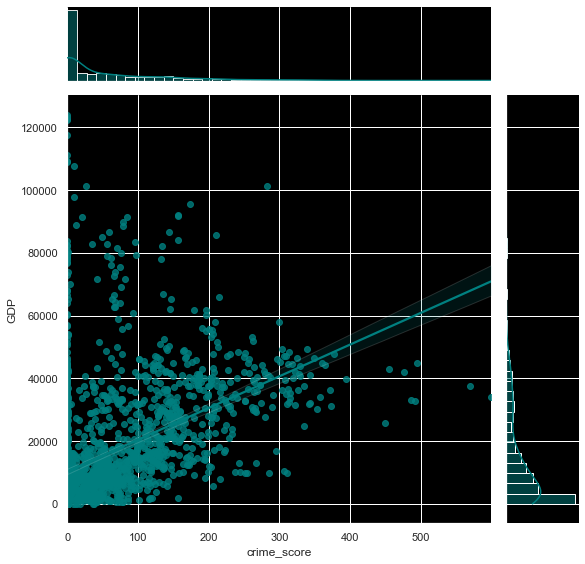

In [125]:
sns.set(rc={'figure.figsize':(15,10),'axes.facecolor':'black'})
sns.jointplot(data=data_final,x='crime_score',y='GDP',kind='reg',color='Teal',height=8)
plt.grid(True)

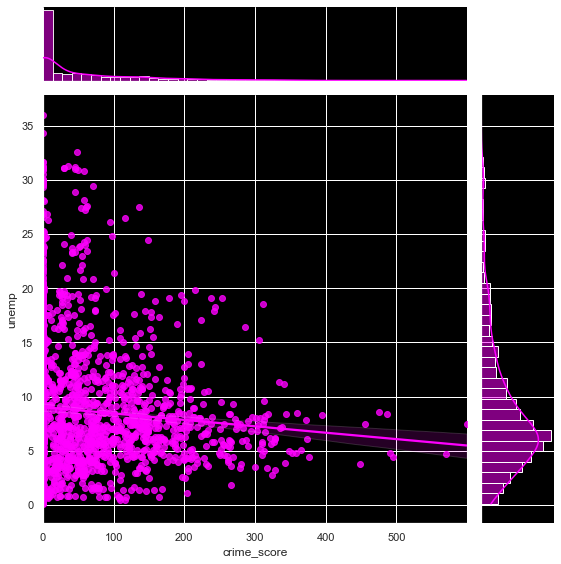

In [126]:
sns.jointplot(data=data_final,x='crime_score',y='unemp',kind='reg',color='Magenta',height=8)

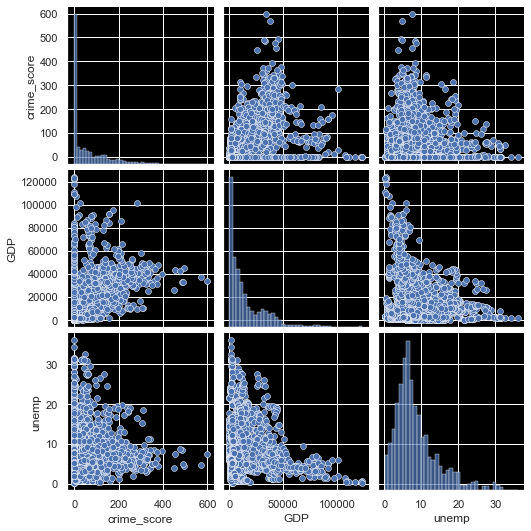

In [127]:
sns.pairplot(data_final)

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



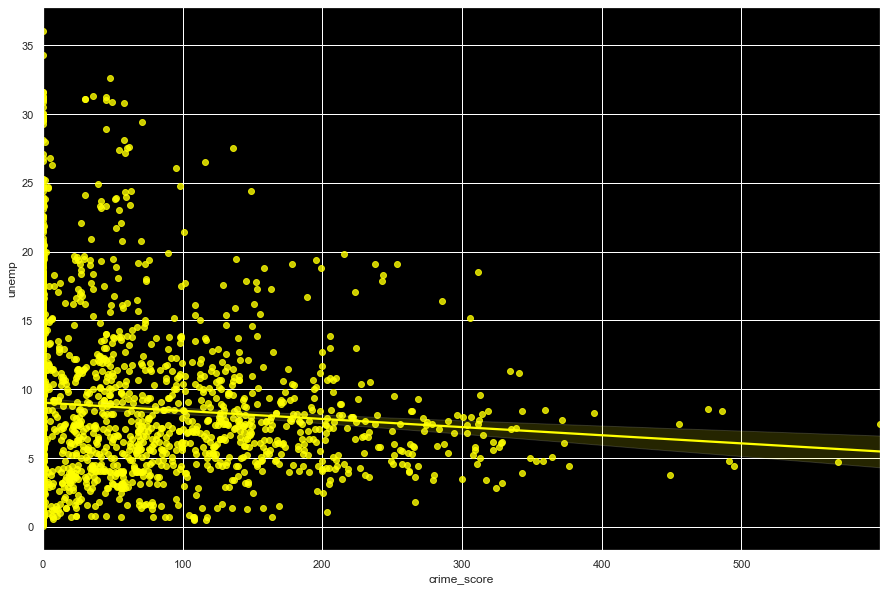

In [128]:
sns.regplot(data_final['crime_score'],data_final['unemp'],color='Yellow')

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



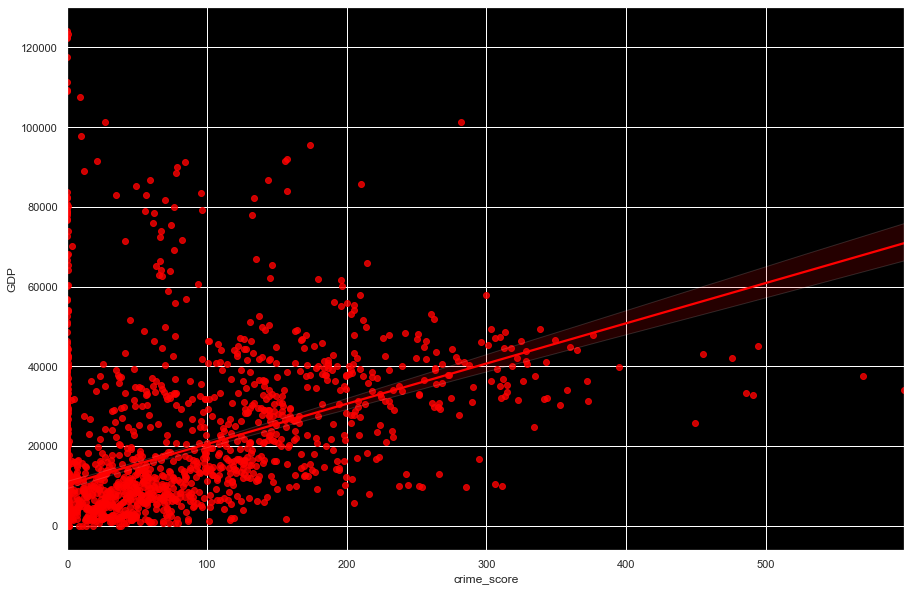

In [129]:
sns.regplot(data_final['crime_score'],data_final['GDP'],color='Red')

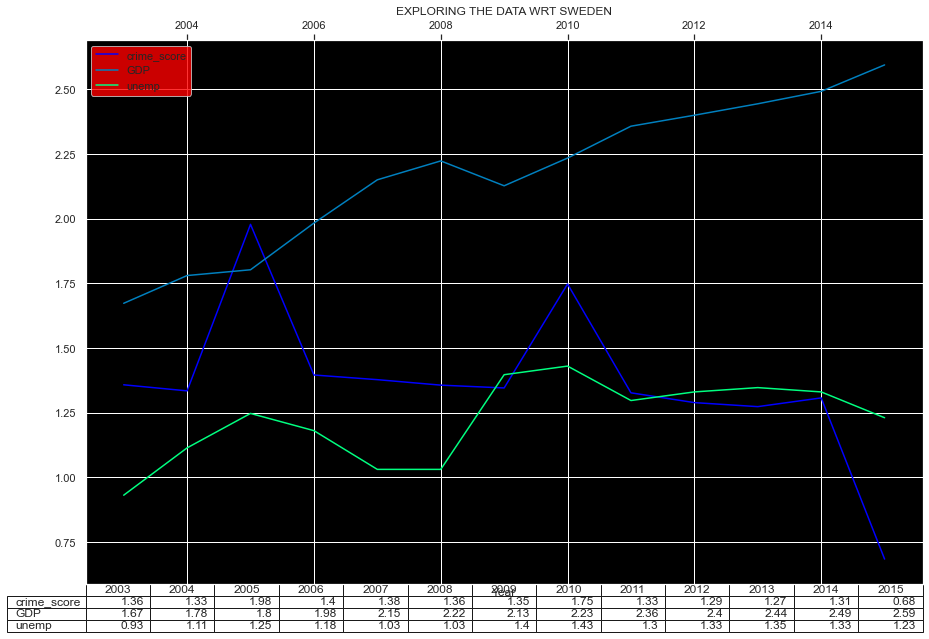

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.patch.set_facecolor('black')
ax.xaxis.tick_top() 
data_plot.loc['Sweden'].plot(table=np.round(data_plot.loc['Sweden'].T, 2), ax=ax,colormap='winter',title='EXPLORING THE DATA WRT SWEDEN')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('Red')


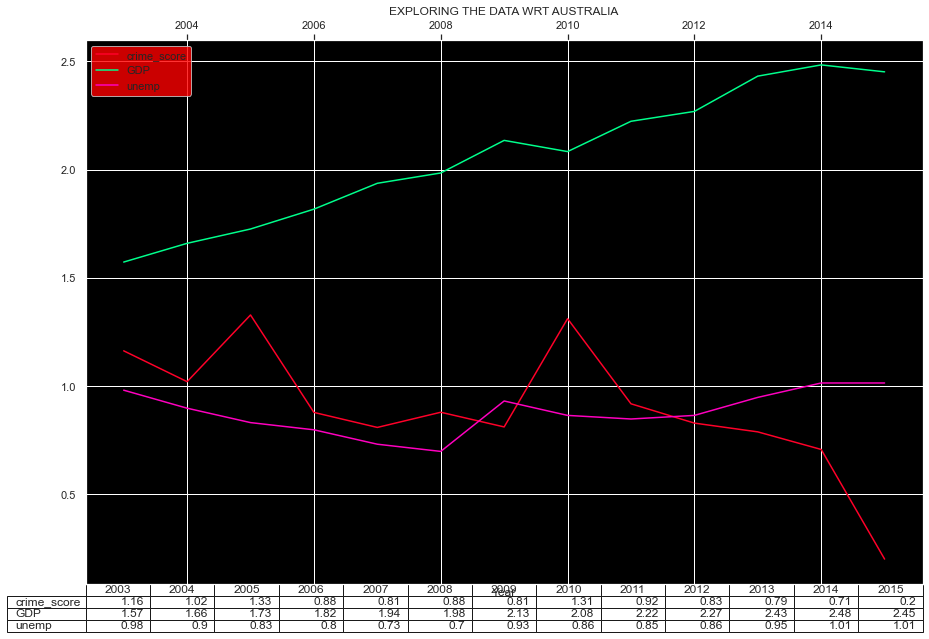

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.patch.set_facecolor('black')
ax.xaxis.tick_top() 
data_plot.loc['Australia'].plot(table=np.round(data_plot.loc['Australia'].T, 2), ax=ax,colormap='gist_rainbow',title='EXPLORING THE DATA WRT AUSTRALIA')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('Red')

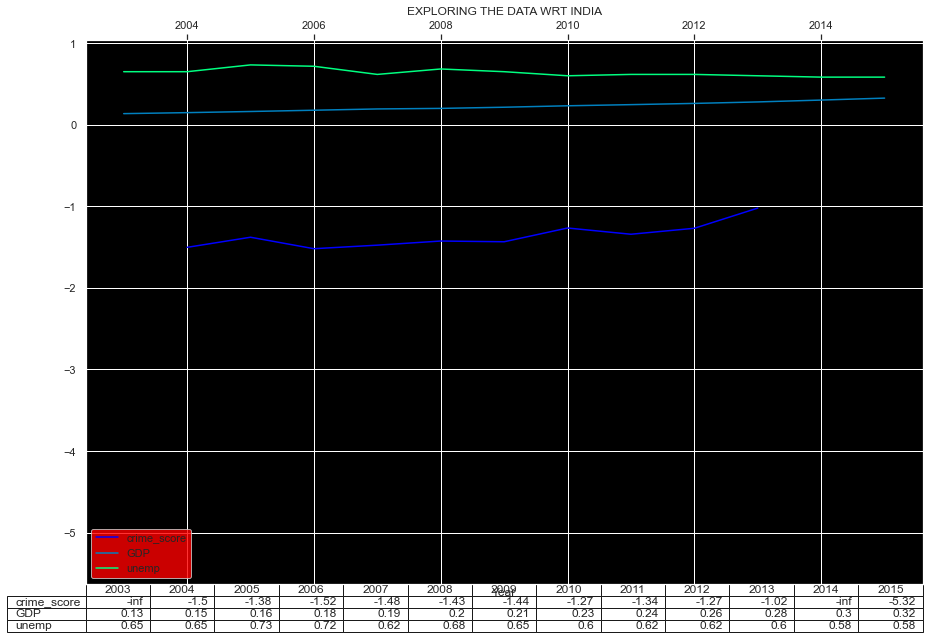

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.patch.set_facecolor('black')
ax.xaxis.tick_top() 
data_plot.loc['India'].plot(table=np.round(data_plot.loc['India'].T, 2), ax=ax,colormap='winter',title='EXPLORING THE DATA WRT INDIA')
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('Red')

In [133]:
data_final.corr()

,crime_score,GDP,unemp
crime_score,1.000000,0.443539,-0.081500
GDP,0.443539,1.000000,-0.169004
unemp,-0.081500,-0.169004,1.000000


Text(0.5, 1.05, 'Correlation Matrix')

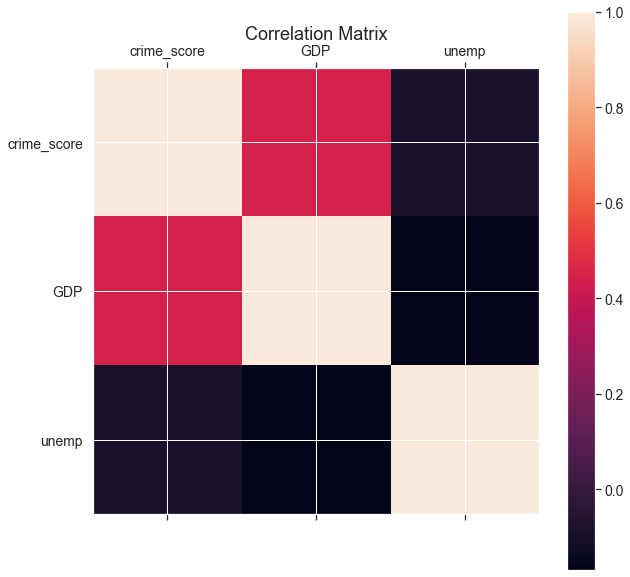

In [134]:
f = plt.figure(figsize=(10, 10))
plt.matshow(data_final.corr(), fignum=f.number)
plt.xticks(range(data_final.shape[1]), data_final.columns, fontsize=14, rotation=0)
plt.yticks(range(data_final.shape[1]), data_final.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix',fontsize=18)

## CONCLUSION AND ASSUMPTION

As it is evident from the data and its visualization that contrary to the popular conception and belief that the correlation between the GDP and the crime rate or score is moderately stroong and is positive i.e with increase in gdp there is moderate increase in the crime or vice versa, although the realtion is moderately strong.
Whereas if we talk about unemployment, that is having weak or no correlation with the crime score or rate.

Now the popular  belief was that, with increase in gdp therev should be lesser crime and with increase in unemployment there should be increase in crime rate or score. But the above data does not stand inn correction with it.

### ASSUMPTION : 

As due to varying efficiency of police of different countries, the crime data is more likely to be reported and gathered in  progressive countries that the countries with hostile and inefficient police. Hence i am thereby taking an assummption that the data is absolute and i am ignoring all the possible contradictions  

## NOW TO GET A MORE FULLER VIEW OF THE PICTURE, LETS TAKE INTO ACCOUNT OF THE DATA OF INDIA IN SPECIFIC

In [135]:
ind_gdp_state = pd.read_csv(r'C:\Users\Satyam\Downloads\ab40c054-5031-4376-b52e-9813e776f65e.csv.csv')
ind_gdp_state #LOADING THE DATA OF INDIAN STATEWISE GDP

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


## DATA CLEANING

In [136]:
ind_gdp_state.rename(columns={'West Bengal1':'West Bengal','Andaman & Nicobar Islands':'Andaman & Nicobar','Andhra Pradesh ':'Andhra Pradesh'},inplace=True)

In [137]:
ind_state = pd.melt(ind_gdp_state,id_vars=['Duration','Items  Description'],var_name='states',value_name='value')

In [138]:
stck=ind_state.set_index(['states','Duration']).pivot(columns='Items  Description')
stck

value  \
Items  Description     (% Growth over previous year)   
states        Duration                                 
All_India GDP 2011-12                            NaN   
              2012-13                          13.86   
              2013-14                          12.97   
              2014-15                          10.65   
              2015-16                           9.99   
...                                              ...   
West Bengal   2012-13                            NaN   
              2013-14                            NaN   
              2014-15                            NaN   
              2015-16                            NaN   
              2016-17                            NaN   

                                                           
Items  Description     GSDP - CURRENT PRICES (` in Crore)  
states        Duration                                     
All_India GDP 2011-12                           8736039.0  
              2012-13                           9946636.0  
              2013-14                          11236635.0  
              2014-15                          12433749.0  
              2015-16                          13675331.0  
...                                                   ...  
West Bengal   2012-13                                 NaN  
              2013-14                                 NaN  
              2014-15                                 NaN  
              2015-16                                 NaN  
              2016-17                                 NaN  

[204 rows x 2 columns]

In [139]:
temp=stck.reset_index()
temp=temp.groupby(by='states').mean()
temp=temp.fillna(0)
temp

C:\Users\Satyam\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



value  \
Items  Description (% Growth over previous year)   
states                                             
All_India GDP                          11.798000   
Andaman & Nicobar                      12.900000   
Andhra Pradesh                         13.036000   
Arunachal Pradesh                      14.162500   
Assam                                  11.877500   
Bihar                                  13.765000   
Chandigarh                             12.755000   
Chhattisgarh                           12.934000   
Delhi                                  12.610000   
Goa                                     2.020000   
Gujarat                                12.767500   
Haryana                                12.998000   
Himachal Pradesh                       12.816667   
Jammu & Kashmir                        11.002500   
Jharkhand                              12.567500   
Karnataka                              14.230000   
Kerala                                 12.752500   
Madhya Pradesh                         15.266000   
Maharashtra                            12.103333   
Manipur                                11.890000   
Meghalaya                               8.244000   
Mizoram                                16.866667   
Nagaland                               15.953333   
Odisha                                 10.740000   
Puducherry                             11.958000   
Punjab                                 11.346667   
Rajasthan                              11.940000   
Sikkim                                 10.492500   
Tamil Nadu                             12.250000   
Telangana                              12.732000   
Tripura                                15.613333   
Uttar Pradesh                          12.367500   
Uttarakhand                            12.382500   
West Bengal                             0.000000   

                                                       
Items  Description GSDP - CURRENT PRICES (` in Crore)  
states                                                 
All_India GDP                            1.187990e+07  
Andaman & Nicobar                        4.820000e+03  
Andhra Pradesh                           5.151312e+05  
Arunachal Pradesh                        1.475140e+04  
Assam                                    1.800232e+05  
Bihar                                    3.268072e+05  
Chandigarh                               2.466240e+04  
Chhattisgarh                             2.213622e+05  
Delhi                                    4.742600e+05  
Goa                                      4.040860e+04  
Gujarat                                  8.074134e+05  
Haryana                                  4.192125e+05  
Himachal Pradesh                         8.866825e+04  
Jammu & Kashmir                          9.600860e+04  
Jharkhand                                1.946542e+05  
Karnataka                                8.124440e+05  
Kerala                                   4.711482e+05  
Madhya Pradesh                           4.667772e+05  
Maharashtra                              1.540265e+06  
Manipur                                  1.522600e+04  
Meghalaya                                2.424133e+04  
Mizoram                                  9.368250e+03  
Nagaland                                 1.512100e+04  
Odisha                                   3.034508e+05  
Puducherry                               2.295700e+04  
Punjab                                   3.167718e+05  
Rajasthan                                5.230910e+05  
Sikkim                                   1.384220e+04  
Tamil Nadu                               1.037009e+06  
Telangana                                4.923692e+05  
Tripura                                  2.403275e+04  
Uttar Pradesh                            9.376528e+05  
Uttarakhand                              1.486502e+05  
West Bengal                              0.000000e+00

## EDA

In [140]:
import pandas as pd
import plotly.express as px

fig = px.choropleth(
    temp,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations=temp.index.unique(),
    color=temp['value']['GSDP - CURRENT PRICES (` in Crore)'],
    color_continuous_scale='Teal',
    title='AVG GDP OF INDIAN STATES IN CRORE'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

In [141]:
import pandas as pd
import plotly.express as px

fig = px.choropleth(
    temp,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations=temp.index.unique(),
    color=temp['value']['(% Growth over previous year)'],
    color_continuous_scale='Teal',
    title=  ' AVG GDP % GROWTH OF INDIAN STATES'
)

fig.update_geos(fitbounds="locations", visible=False)

fig.show()

### LOADING CRIME PER STATE DATA 

In [142]:
ind_crime_state=pd.read_csv(r'C:\Users\Satyam\Downloads\crimes.csv') #LOADING STATEWISE CRIMME DATA OF SEVERAL YEARS

## DATA CLEANING

In [143]:
ind_crime=ind_crime_state.drop(columns='Unnamed: 0')

In [144]:
crime=pd.melt(ind_crime,id_vars=['STATE NAME','CRIME PER SHARE (STATE)','CRIME RATE'],var_name='year',value_name='crime')

In [145]:
crime['STATE NAME']=crime['STATE NAME'].str.capitalize()

In [146]:
crime['year']=crime['year'].str.extract('(\d\d\d\d)')
crime

,STATE NAME,CRIME PER SHARE (STATE),CRIME RATE,year,crime
0,Andhra pradesh,3.6,206.4,2014,114604
1,Arunachal pradesh,0.1,192.3,2014,2843
2,Assam,3.4,313.9,2014,94337
3,Bihar,5.5,157.4,2014,177595
4,Chhattisgarh,1.8,211.7,2014,58200
...,...,...,...,...,...
103,Dadra & nagar haveli,0.0,57.4,2016,244
104,Daman & diu,0.0,81.1,2016,271
105,Nct of delhi,7.0,974.9,2016,209519
106,Lakshadweep,0.0,43.9,2016,36


In [147]:
crime2=crime.sort_values(by='STATE NAME').set_index(['STATE NAME','year'])
crime2

CRIME PER SHARE (STATE)  CRIME RATE   crime
STATE NAME                year                                             
Andaman & nicobar islands 2014                      0.0       144.8     746
                          2015                      0.0       144.8     862
                          2016                      0.0       144.8     802
Andhra pradesh            2014                      3.6       206.4  114604
                          2016                      3.6       206.4  106774
...                                                 ...         ...     ...
Uttarakhand               2016                      0.4       101.8   10867
                          2015                      0.4       101.8   10248
West bengal               2016                      5.9       188.2  176569
                          2014                      5.9       188.2  185672
                          2015                      5.9       188.2  179501

[108 rows x 3 columns]

In [148]:
stck=stck.reset_index()
stck['year']=stck['Duration'].str.extract('(\d\d\d\d)')

In [149]:
stck.rename(columns={'states':'STATE NAME'},inplace=True)

In [150]:
stck

STATE NAME Duration                         value  \
Items  Description                         (% Growth over previous year)   
0                   All_India GDP  2011-12                           NaN   
1                   All_India GDP  2012-13                         13.86   
2                   All_India GDP  2013-14                         12.97   
3                   All_India GDP  2014-15                         10.65   
4                   All_India GDP  2015-16                          9.99   
..                            ...      ...                           ...   
199                   West Bengal  2012-13                           NaN   
200                   West Bengal  2013-14                           NaN   
201                   West Bengal  2014-15                           NaN   
202                   West Bengal  2015-16                           NaN   
203                   West Bengal  2016-17                           NaN   

                                                       year  
Items  Description GSDP - CURRENT PRICES (` in Crore)        
0                                           8736039.0  2011  
1                                           9946636.0  2012  
2                                          11236635.0  2013  
3                                          12433749.0  2014  
4                                          13675331.0  2015  
..                                                ...   ...  
199                                               NaN  2012  
200                                               NaN  2013  
201                                               NaN  2014  
202                                               NaN  2015  
203                                               NaN  2016  

[204 rows x 5 columns]

In [151]:
stck=stck.drop(columns='Duration')

C:\Users\Satyam\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [152]:
stck=stck.set_index(['STATE NAME','year'])


In [153]:
stck

value  \
Items  Description (% Growth over previous year)   
STATE NAME    year                                 
All_India GDP 2011                           NaN   
              2012                         13.86   
              2013                         12.97   
              2014                         10.65   
              2015                          9.99   
...                                          ...   
West Bengal   2012                           NaN   
              2013                           NaN   
              2014                           NaN   
              2015                           NaN   
              2016                           NaN   

                                                       
Items  Description GSDP - CURRENT PRICES (` in Crore)  
STATE NAME    year                                     
All_India GDP 2011                          8736039.0  
              2012                          9946636.0  
              2013                         11236635.0  
              2014                         12433749.0  
              2015                         13675331.0  
...                                               ...  
West Bengal   2012                                NaN  
              2013                                NaN  
              2014                                NaN  
              2015                                NaN  
              2016                                NaN  

[204 rows x 2 columns]

In [154]:
data=crime2.merge(stck,left_index=True,right_on=['STATE NAME','year'])

C:\Users\Satyam\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning:

merging between different levels can give an unintended result (1 levels on the left, 2 on the right)



In [155]:
data

CRIME PER SHARE (STATE)  CRIME RATE   crime  \
STATE NAME  year                                                
Assam       2014                      3.4       313.9   94337   
            2016                      3.4       313.9  102250   
            2015                      3.4       313.9  103616   
Bihar       2015                      5.5       157.4  176973   
            2014                      5.5       157.4  177595   
...                                   ...         ...     ...   
Tripura     2016                      0.1       102.4    3933   
            2015                      0.1       102.4    4692   
Uttarakhand 2014                      0.4       101.8    9156   
            2016                      0.4       101.8   10867   
            2015                      0.4       101.8   10248   

                  (value, (% Growth over previous year))  \
STATE NAME  year                                           
Assam       2014                                   11.45   
            2016                                     NaN   
            2015                                   13.19   
Bihar       2015                                   10.59   
            2014                                   17.92   
...                                                  ...   
Tripura     2016                                     NaN   
            2015                                     NaN   
Uttarakhand 2014                                    8.12   
            2016                                     NaN   
            2015                                   13.65   

                  (value, GSDP - CURRENT PRICES (` in Crore))  
STATE NAME  year                                               
Assam       2014                                     198098.0  
            2016                                          NaN  
            2015                                     224234.0  
Bihar       2015                                     413503.0  
            2014                                     373920.0  
...                                                       ...  
Tripura     2016                                          NaN  
            2015                                          NaN  
Uttarakhand 2014                                     161985.0  
            2016                                          NaN  
            2015                                     184091.0  

[69 rows x 5 columns]

In [156]:
data.rename(columns={('value', '(% Growth over previous year)'):'pct_gdp', ('value', 'GSDP - CURRENT PRICES (` in Crore)'):'gdp'},inplace=True)
data

CRIME PER SHARE (STATE)  CRIME RATE   crime  pct_gdp  \
STATE NAME  year                                                         
Assam       2014                      3.4       313.9   94337    11.45   
            2016                      3.4       313.9  102250      NaN   
            2015                      3.4       313.9  103616    13.19   
Bihar       2015                      5.5       157.4  176973    10.59   
            2014                      5.5       157.4  177595    17.92   
...                                   ...         ...     ...      ...   
Tripura     2016                      0.1       102.4    3933      NaN   
            2015                      0.1       102.4    4692      NaN   
Uttarakhand 2014                      0.4       101.8    9156     8.12   
            2016                      0.4       101.8   10867      NaN   
            2015                      0.4       101.8   10248    13.65   

                       gdp  
STATE NAME  year            
Assam       2014  198098.0  
            2016       NaN  
            2015  224234.0  
Bihar       2015  413503.0  
            2014  373920.0  
...                    ...  
Tripura     2016       NaN  
            2015       NaN  
Uttarakhand 2014  161985.0  
            2016       NaN  
            2015  184091.0  

[69 rows x 5 columns]

In [157]:
data.corr()

,CRIME PER SHARE (STATE),CRIME RATE,crime,pct_gdp,gdp
CRIME PER SHARE (STATE),1.000000,0.655024,0.993925,0.173225,0.817448
CRIME RATE,0.655024,1.000000,0.617818,0.145104,0.343882
crime,0.993925,0.617818,1.000000,0.187738,0.799958
pct_gdp,0.173225,0.145104,0.187738,1.000000,0.018936
gdp,0.817448,0.343882,0.799958,0.018936,1.000000


## DATA VISUALIZATION

Text(0.5, 1.05, 'Correlation Matrix')

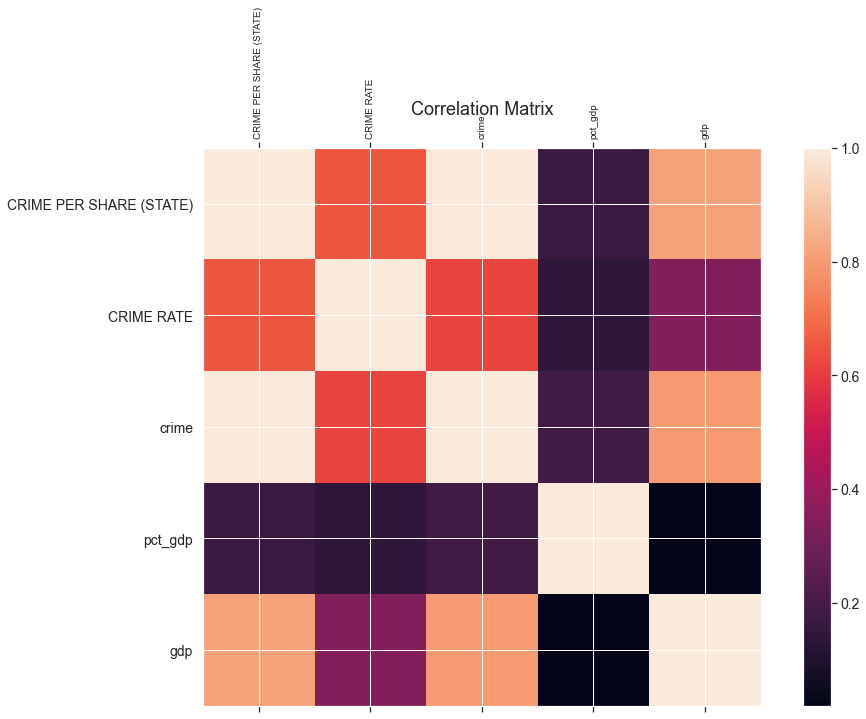

In [158]:
f = plt.figure(figsize=(15, 10))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=10, rotation=90)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix',fontsize=18)

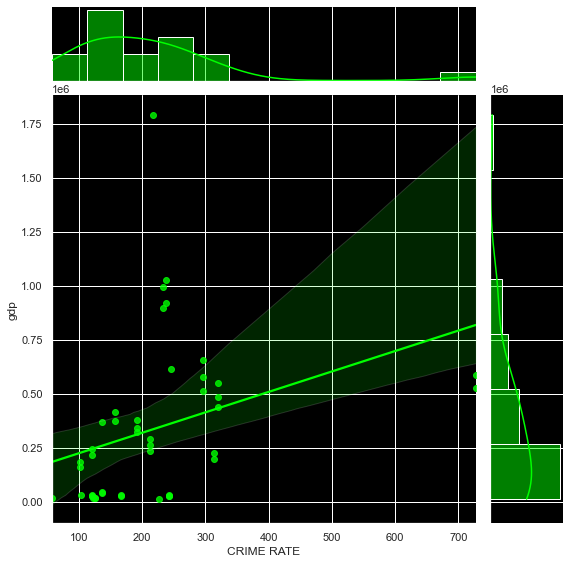

In [159]:
sns.set(rc={'figure.figsize':(12.5,12.5),'axes.facecolor':'black'})
sns.jointplot(data=data,x='CRIME RATE',y='gdp',kind='reg',color='lime',height=8)
plt.grid(True)

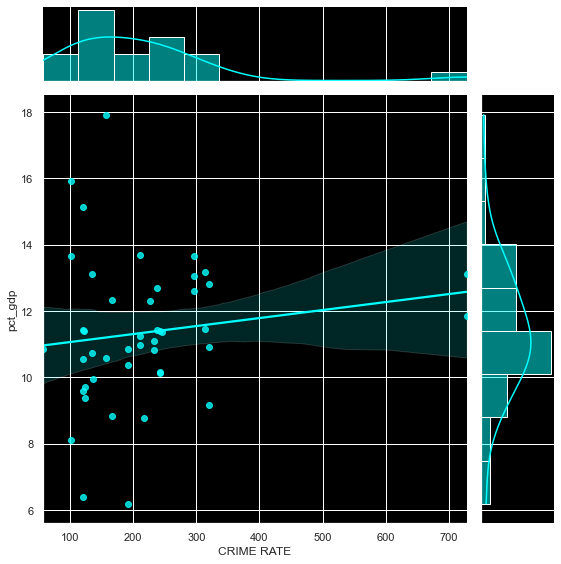

In [160]:
sns.set(rc={'figure.figsize':(12.5,12.5),'axes.facecolor':'black'})
sns.jointplot(data=data,x='CRIME RATE',y='pct_gdp',kind='reg',color='aqua',height=8)
plt.grid(True)

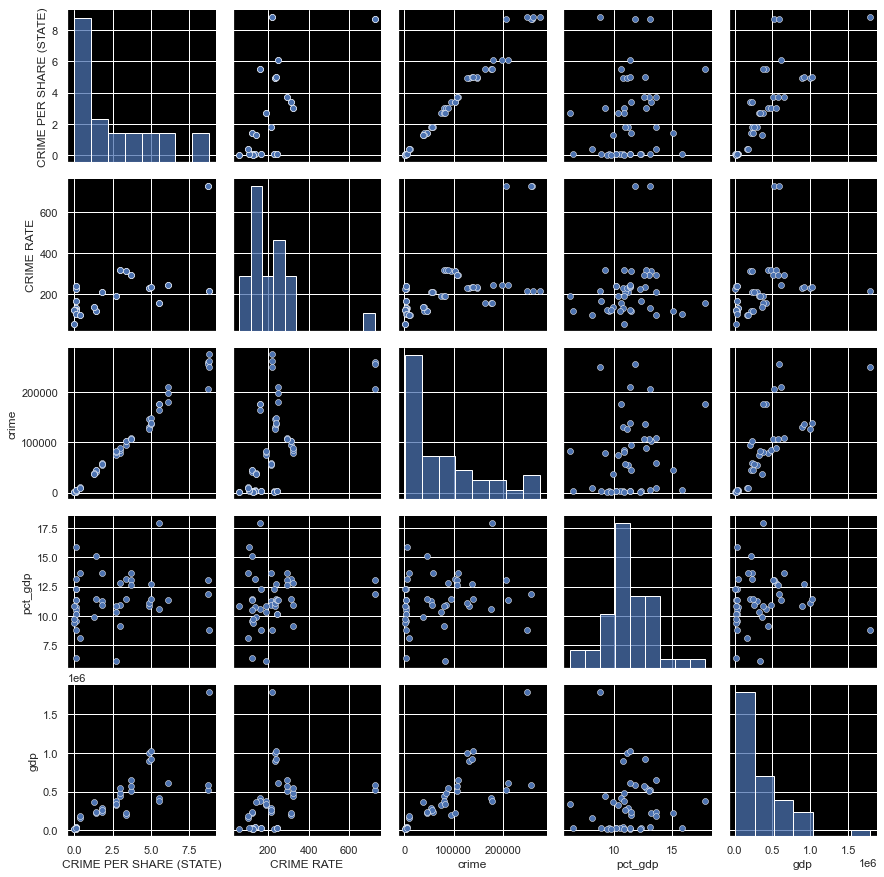

In [161]:
sns.pairplot(data,palette='cubehelix_r')

C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



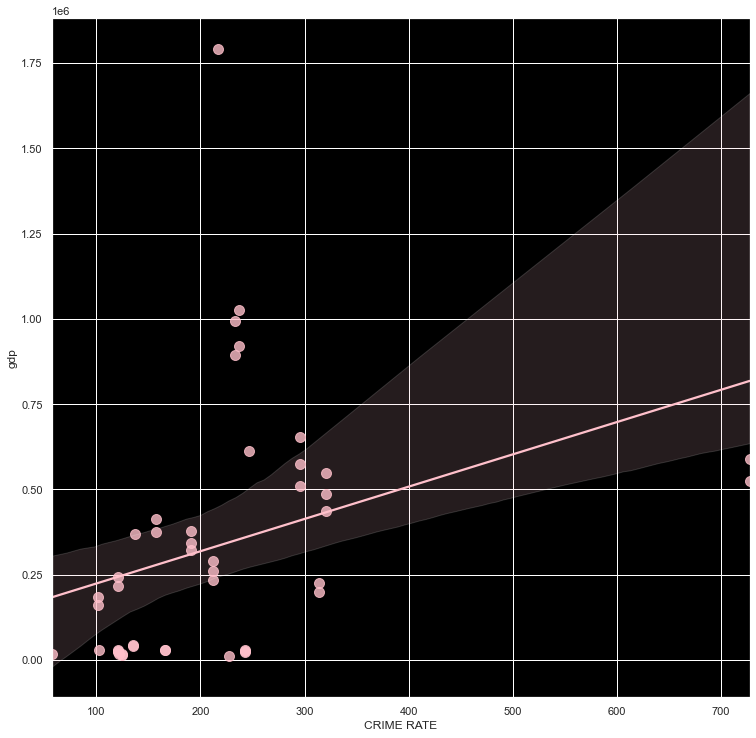

In [162]:
sns.regplot(data['CRIME RATE'],data['gdp'],color='pink',scatter_kws={'s':100})


C:\Users\Satyam\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



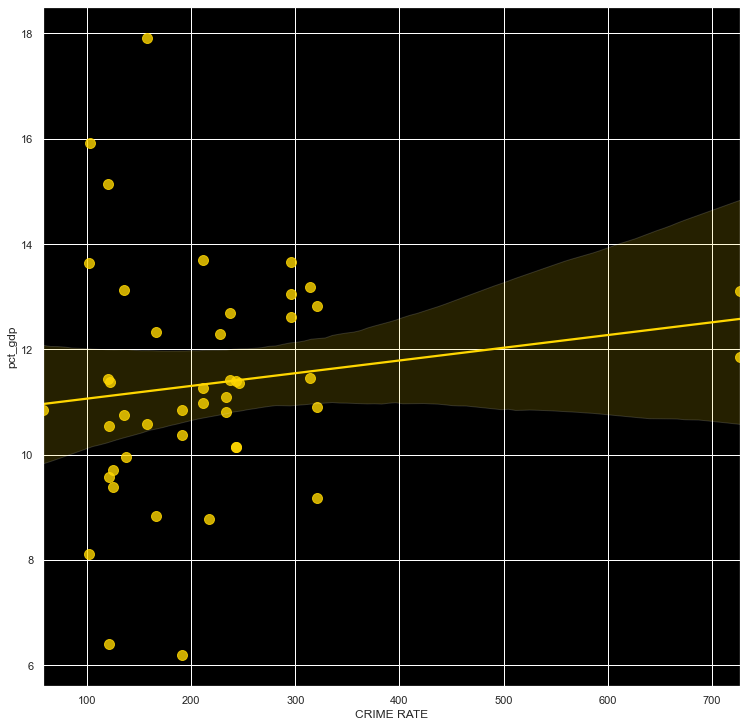

In [163]:
sns.regplot(data['CRIME RATE'],data['pct_gdp'],color='gold',scatter_kws={'s':100})

## CONCLUSION

Here too, there was no clear relation established between the GDP and the crime rate, the strength of the relation was moderately low, and hence it came down to insignificant.

### HENCE THE RESULT OF THIS ANALYSIS FILE STATES THAT THERE COULD NOT BE  ANY ESTABLISHED  CLEAR RELATION BETWEEN THE GDP AND THE CRIME OF ANY REGION. THESE TWO FACTORS REMAIN INDEPENDENT.